# Import necessary libraries to work on data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Reading and understanding data

In [2]:
lead_data = pd.read_csv(r"E:\My certificates\Lead score assignment\Assignment Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# let us uderstand the columns and data types

In [3]:
lead_data.shape

(9240, 37)

In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# There are different types of data availabe in the data set. Also we can see there are also null values in the columns.


In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data.duplicated().sum()

0

In [8]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#Let us treat the columns with null values. Columns with more than 30 % null values can be dropped

In [9]:
lead_data.shape[0]

9240

In [10]:
for col in lead_data.columns:
    if lead_data[col].isnull().sum() > 0.3 * lead_data.shape[0]:
        lead_data.drop(col, 1, inplace = True)

In [11]:
lead_data.shape

(9240, 31)

In [12]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#This column has the distribution skewed. So we can drop the column.

In [14]:
lead_data.drop(['Country'], axis = 1, inplace = True)

In [15]:
lead_data['What is your current occupation'].value_counts(normalize = True, dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [16]:
#let us remove the rows with null values

In [17]:
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]


In [18]:
lead_data['Lead Profile'].value_counts(normalize = True, dropna = False)*100

Select                         63.297710
Potential Lead                 24.625954
Other Leads                     7.435115
Student of SomeSchool           3.679389
Lateral Student                 0.366412
Dual Specialization Student     0.305344
NaN                             0.290076
Name: Lead Profile, dtype: float64

##In this column select seems to be a null value. Let us drop this column.

In [19]:
lead_data.drop(['Lead Profile'], axis = 1, inplace = True)

In [20]:
lead_data['City'].value_counts()

Mumbai                         2489
Select                         2249
Thane & Outskirts               592
Other Cities                    524
Other Cities of Maharashtra     350
Other Metro Cities              293
Tier II Cities                   53
Name: City, dtype: int64

In [21]:
lead_data['City'] = lead_data['City'].replace('Select','Mumbai')

In [22]:
lead_data['City'].value_counts()

Mumbai                         4738
Thane & Outskirts               592
Other Cities                    524
Other Cities of Maharashtra     350
Other Metro Cities              293
Tier II Cities                   53
Name: City, dtype: int64

In [23]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False)* 100 

Better Career Prospects      99.664122
NaN                           0.290076
Flexibility & Convenience     0.030534
Other                         0.015267
Name: What matters most to you in choosing a course, dtype: float64

In [24]:
# Let's drop this column as it seems to skewed.

In [25]:
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [26]:
lead_data['How did you hear about X Education'].value_counts() 

Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

In [27]:
lead_data['Specialization'].value_counts() 

Select                               1929
Finance Management                    762
Marketing Management                  678
Human Resource Management             676
Operations Management                 395
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 125
Hospitality Management                 93
E-COMMERCE                             81
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [28]:
##This distribution seems good but needs categorisation.categories based on the course type, and then impute proportionally to maintain the distribution 

In [29]:
# categorize all management courses
lead_data.loc[(lead_data.Specialization == 'Finance Management') | (lead_data.Specialization == 'Human Resource Management') | 
       (lead_data.Specialization == 'Marketing Management') |  (lead_data.Specialization == 'Operations Management') |
       (lead_data.Specialization == 'IT Projects Management') | (lead_data.Specialization == 'Supply Chain Management') |
       (lead_data.Specialization == 'Healthcare Management') | (lead_data.Specialization == 'Hospitality Management') |
       (lead_data.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
lead_data.loc[(lead_data.Specialization == 'Business Administration') | (lead_data.Specialization == 'International Business') | 
       (lead_data.Specialization == 'Rural and Agribusiness') | (lead_data.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
lead_data.loc[(lead_data.Specialization == 'Banking, Investment And Insurance') | (lead_data.Specialization == 'Media and Advertising') |
       (lead_data.Specialization == 'Travel and Tourism') | (lead_data.Specialization == 'Services Excellence') |
       (lead_data.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [30]:
lead_data['Specialization'].value_counts() 

Management Specializations    3363
Select                        1929
Industry Specializations       687
Business Specializations       553
Name: Specialization, dtype: int64

In [31]:
# impute proportionately
lead_data['Specialization'] = lead_data.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(lead_data))))

In [32]:
lead_data['Specialization'].value_counts() 

Management Specializations    3375
Select                        1929
Industry Specializations       690
Business Specializations       554
Name: Specialization, dtype: int64

In [33]:
lead_data['Specialization'] = lead_data['Specialization'].replace('Select','Management Specializations')

In [34]:
lead_data['Specialization'].value_counts() 

Management Specializations    5304
Industry Specializations       690
Business Specializations       554
Name: Specialization, dtype: int64

In [35]:
lead_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 130
Total Time Spent on Website                   0
Page Views Per Visit                        130
Last Activity                               103
Specialization                                2
How did you hear about X Education           19
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [36]:
lead_data.shape

(6550, 28)

In [37]:
lead_data['Lead Source'].value_counts(normalize = True, dropna = False)*100 

Google               31.267176
Direct Traffic       28.870229
Olark Chat           13.633588
Organic Search       13.282443
Reference             8.152672
Welingak Website      2.167939
Referral Sites        1.145038
Facebook              0.702290
NaN                   0.549618
Click2call            0.061069
bing                  0.045802
Social Media          0.030534
Live Chat             0.030534
Pay per Click Ads     0.015267
WeLearn               0.015267
testone               0.015267
Press_Release         0.015267
Name: Lead Source, dtype: float64

In [38]:
lead_data = lead_data[~pd.isnull(lead_data['Last Activity'])]

In [39]:
lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [40]:
lead_data = lead_data[~pd.isnull(lead_data['TotalVisits'])]

In [41]:
lead_data = lead_data[~pd.isnull(lead_data['Page Views Per Visit'])]

In [42]:
lead_data = lead_data[~pd.isnull(lead_data['Specialization'])]

In [43]:
lead_data = lead_data[~pd.isnull(lead_data['How did you hear about X Education'])]

In [44]:
lead_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [45]:
lead_data.shape

(6372, 28)

##Initially there were a total of 9240 rows and now it is 6372 rows. which is 69 percent of the data. It seems still we have sufficient data to prepare our model

Let us understand these variables

In [46]:
# determine unique values for all object datatype columns
for k, v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Prospect ID = 6372
Lead Origin = 4
Lead Source = 16
Do Not Email = 2
Do Not Call = 2
Last Activity = 16
Specialization = 3
How did you hear about X Education = 10
What is your current occupation = 6
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 1
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 6
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 14


In [47]:
#Prospect ID is the identification of the individual, it may not be of use in our model. Let's drop it
lead_data.drop(['Prospect ID'], axis = 1, inplace = True)

##Let us try to understand the columns with unique objects

In [48]:
def percent_plot(var):
    values = (lead_data[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

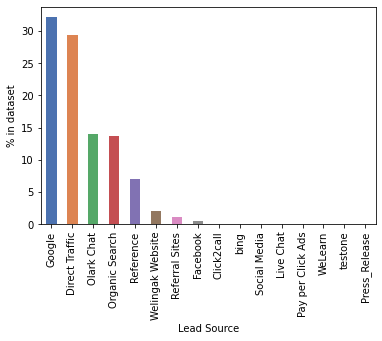

In [49]:
percent_plot('Lead Source')

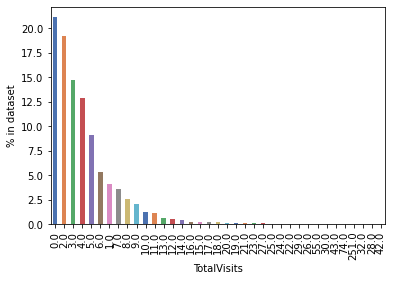

In [50]:
percent_plot('TotalVisits')

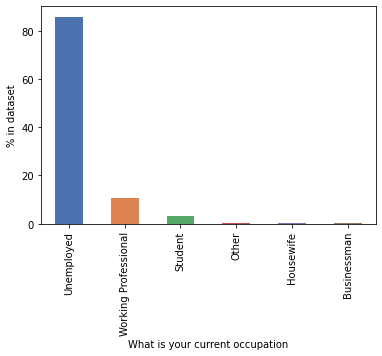

In [51]:
percent_plot('What is your current occupation')

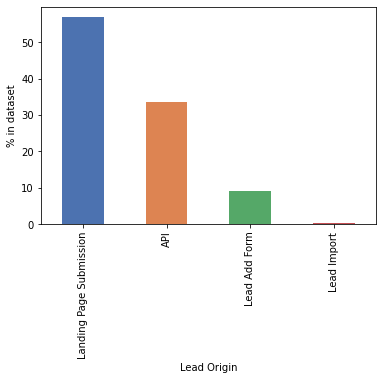

In [52]:
percent_plot("Lead Origin")

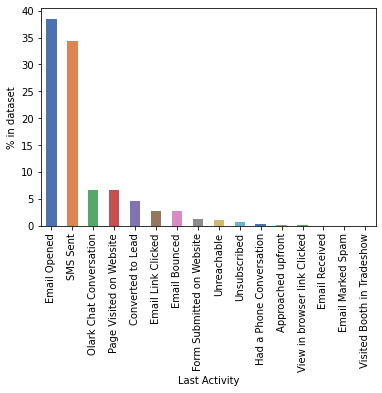

In [53]:
percent_plot('Last Activity')

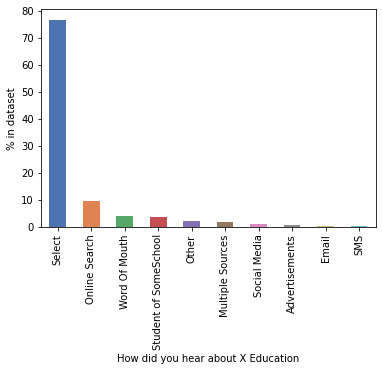

In [54]:
percent_plot('How did you hear about X Education')

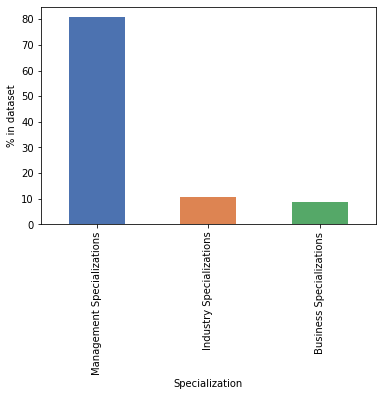

In [55]:
percent_plot('Specialization')

In [56]:
lead_data['Newspaper Article'].value_counts()

No     6371
Yes       1
Name: Newspaper Article, dtype: int64

In [57]:
lead_data['X Education Forums'].value_counts()

No    6372
Name: X Education Forums, dtype: int64

In [58]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    6372
Name: I agree to pay the amount through cheque, dtype: int64

In [59]:
lead_data['Magazine'].value_counts()

No    6372
Name: Magazine, dtype: int64

In [60]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    6372
Name: Update me on Supply Chain Content, dtype: int64

In [61]:
## Let us drop all these columns which have unique values < 2
data_to_drop = ['Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

lead_data.drop(data_to_drop, axis = 1, inplace =True)

In [62]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [63]:
lead_data['Lead Number'].value_counts()

660737    1
600947    1
600956    1
600979    1
600997    1
         ..
629468    1
629483    1
629491    1
629507    1
579533    1
Name: Lead Number, Length: 6372, dtype: int64

In [64]:
## The column Lead Number is also of no use as it is an id.
lead_data.drop('Lead Number', axis = 1, inplace = True)

In [65]:
lead_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google               32.140615
Direct Traffic       29.394225
Olark Chat           13.998745
Organic Search       13.653484
Reference             6.952291
Welingak Website      2.024482
Referral Sites        1.161331
Facebook              0.439422
Click2call            0.062775
bing                  0.047081
Social Media          0.031387
Live Chat             0.031387
Pay per Click Ads     0.015694
WeLearn               0.015694
testone               0.015694
Press_Release         0.015694
Name: Lead Source, dtype: float64

In [66]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         6372 non-null   object 
 1   Lead Source                         6372 non-null   object 
 2   Converted                           6372 non-null   int64  
 3   TotalVisits                         6372 non-null   float64
 4   Total Time Spent on Website         6372 non-null   int64  
 5   Page Views Per Visit                6372 non-null   float64
 6   Last Activity                       6372 non-null   object 
 7   Specialization                      6372 non-null   object 
 8   How did you hear about X Education  6372 non-null   object 
 9   What is your current occupation     6372 non-null   object 
 10  City                                6372 non-null   object 
 11  Last Notable Activity               6372 no

We saw percentage plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variable 'Converted'

# Now we have all the data required to further analysis


# Exploratory Data Analysis

Numerical columns

In [67]:
# #Check the % of Data that has Converted Values = 1:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

48.10106716886378

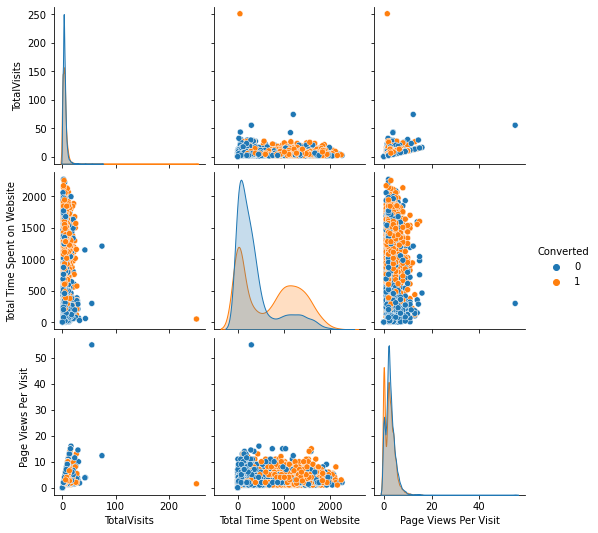

In [68]:
lead = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead,diag_kind='auto',hue='Converted')
plt.show()

In [69]:
# ploting bar chart for continous column
con_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

TotalVisits


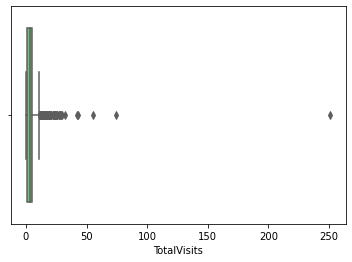

Total Time Spent on Website


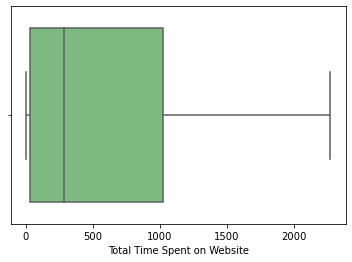

Page Views Per Visit


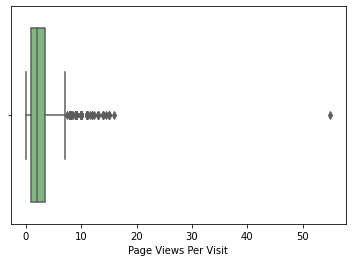

In [70]:
for i in con_col:
    print(i)
    sns.boxplot(lead_data[i],palette='Greens')
    plt.show()

##Let us remove outliers in these columns

In [71]:
#checking percentile values for "Total Visits"

lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6372.000000
mean        3.606717
std         4.852274
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.290000
max       251.000000
Name: TotalVisits, dtype: float64

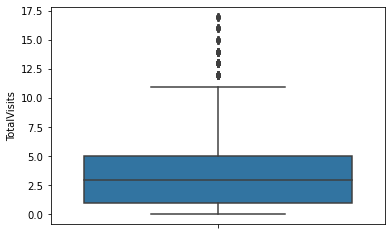

In [72]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.01)
lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [73]:
#checking spread of "Page Views Per Visit"

lead_data['Page Views Per Visit'].describe()

count    6308.000000
mean        2.452941
std         2.045289
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        16.000000
Name: Page Views Per Visit, dtype: float64

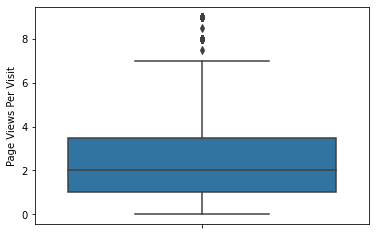

In [74]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data['Page Views Per Visit'] <= Q3]
Q1 = lead_data['Page Views Per Visit'].quantile(0.01)
lead_data = lead_data[lead_data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

##There are no major Outliers for the variable 'Total Time Spent on Website'. We don't do any Outlier Treatment for this Column

##Let us again plot these variables to get insights into the data.

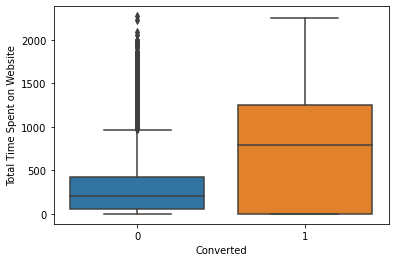

In [75]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_data.Converted, y=lead_data['Total Time Spent on Website'])
plt.show()

1. Leads spending more time on the website are more likely to be converted.

2. Website should be made more engaging to make leads spend more time.

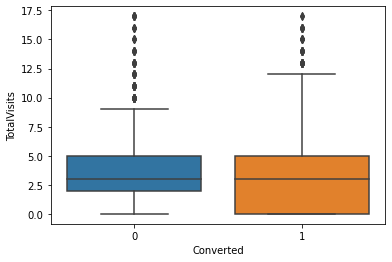

In [76]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(x=lead_data.Converted,y=lead_data['TotalVisits'])
plt.show()

1. Median for converted and not converted leads are the close.

2. Nothng conclusive can be said on the basis of Total Visits

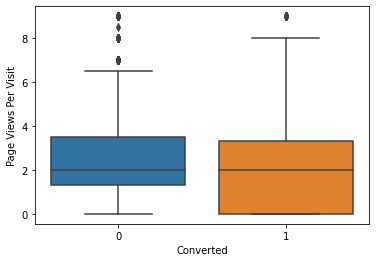

In [77]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead_data.Converted,y=lead_data['Page Views Per Visit'])
plt.show()

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

In [78]:
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.show()

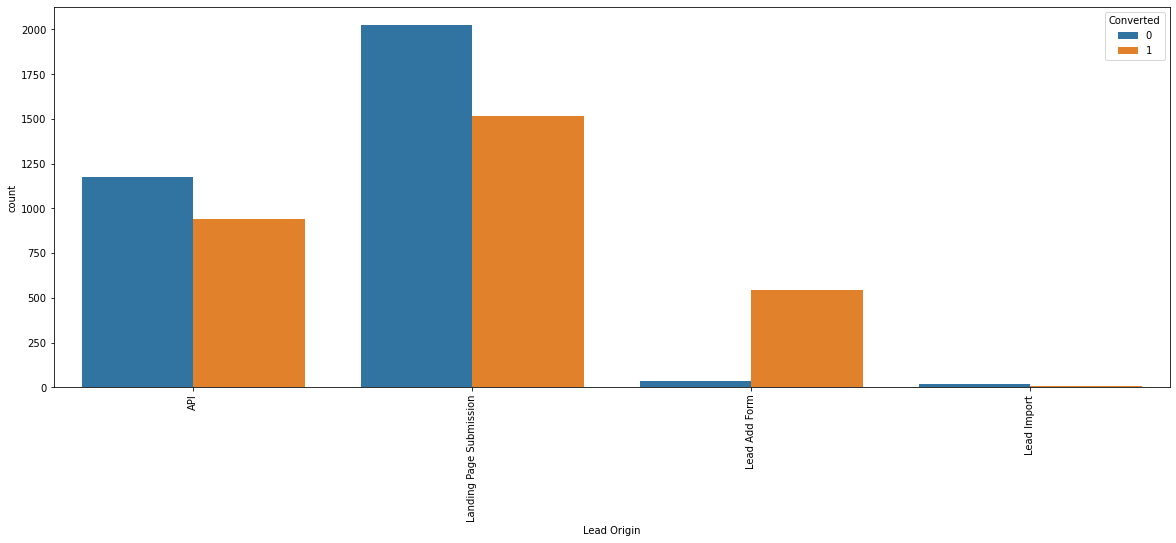

In [79]:
plot_cat_var('Lead Origin')

'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

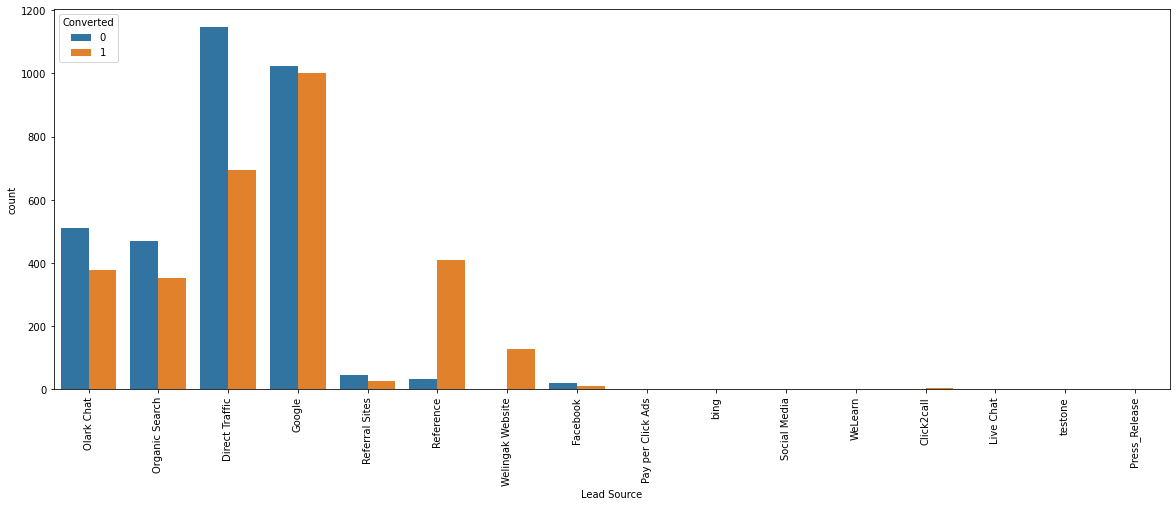

In [80]:
plot_cat_var('Lead Source')

'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

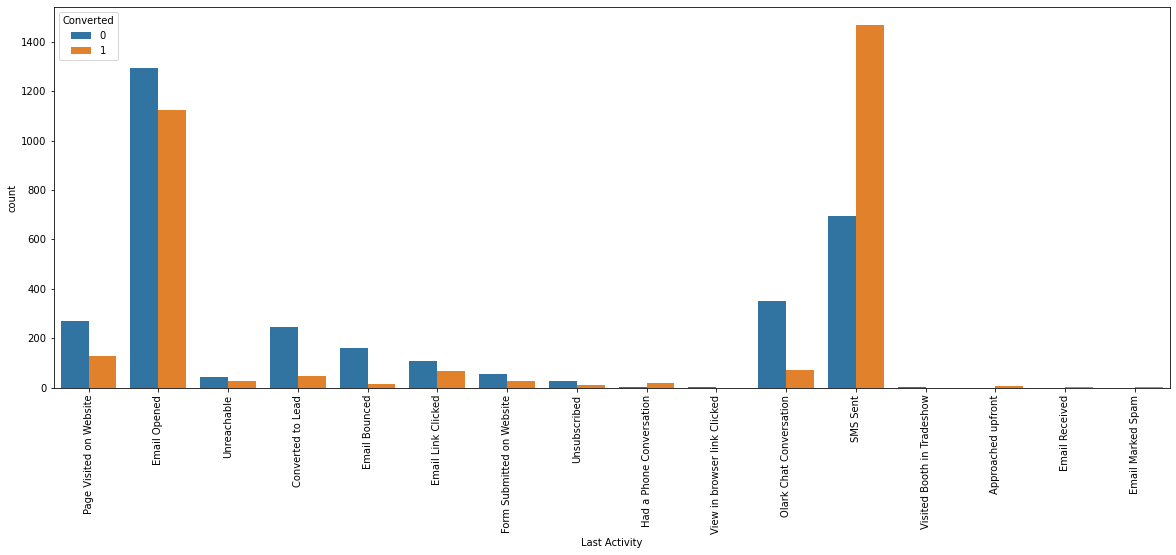

In [81]:
plot_cat_var('Last Activity')

Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category

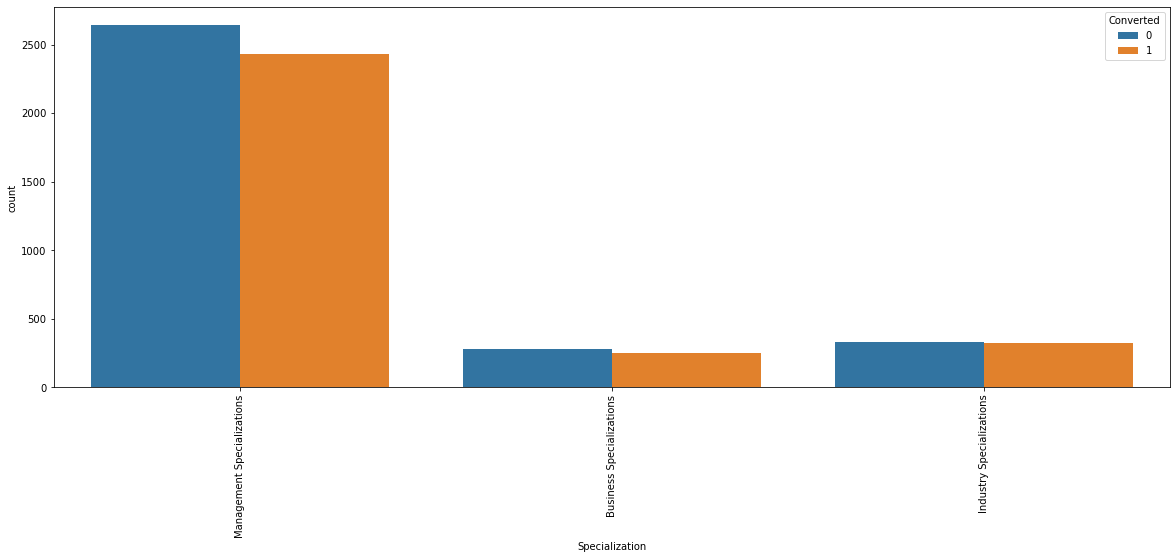

In [82]:
plot_cat_var('Specialization')

The highest conversion rate is for 'Management Specialization' category.

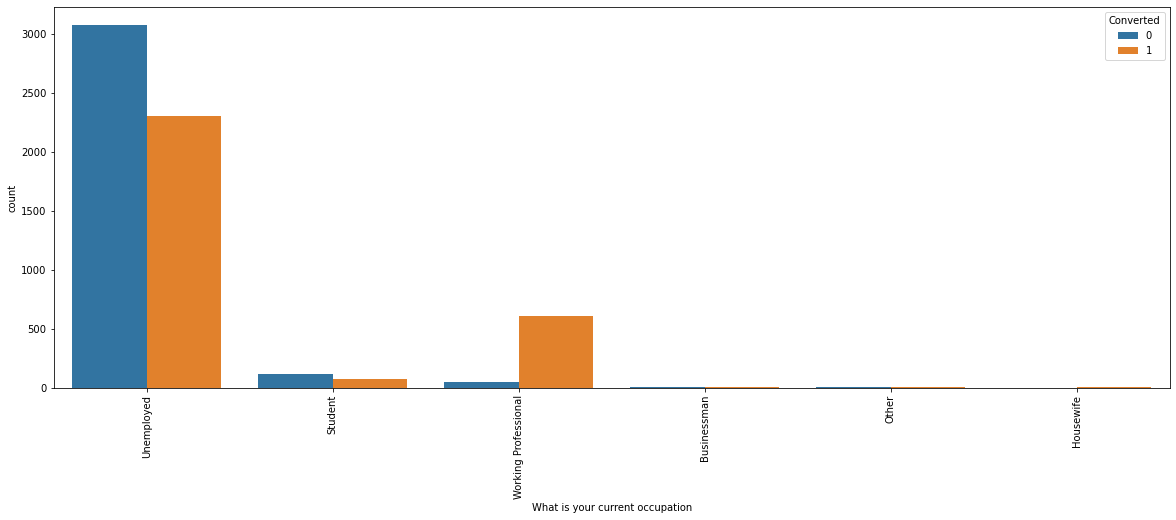

In [83]:
plot_cat_var('What is your current occupation')

The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.

# Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [84]:
# Check the columns which are of type 'object'

data1 = lead_data.loc[:, lead_data.dtypes == 'object']
data1.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'Last Notable Activity'],
      dtype='object')

In [85]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [86]:
# Drop the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'City', 'Last Notable Activity'], 1)

In [87]:
lead_data.head(10)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13,0,5.0,170,5.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14,0,1.0,481,1.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Converted                                                 6263 non-null   int64  
 1   TotalVisits                                               6263 non-null   float64
 2   Total Time Spent on Website                               6263 non-null   int64  
 3   Page Views Per Visit                                      6263 non-null   float64
 4   Lead Origin_Landing Page Submission                       6263 non-null   uint8  
 5   Lead Origin_Lead Add Form                                 6263 non-null   uint8  
 6   Lead Origin_Lead Import                                   6263 non-null   uint8  
 7   Lead Source_Direct Traffic                                6263 non-null   uint8  
 8   Lead Source_Facebo

# Test-Train Split
The next step is to split the dataset into training an testing sets.

In [89]:
# Import the required library

from sklearn.model_selection import train_test_split

In [90]:
X = lead_data.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [93]:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3177,0.235294,0.405370,0.222222,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
169,0.176471,0.167694,0.166667,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3549,0.235294,0.530370,0.444444,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9140,0.117647,0.050176,0.222222,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2994,0.411765,0.113116,0.777778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [94]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [96]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_testone', False, 27),
 ('Last Activity_Converted to Lead', False, 14),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 56),
 ('Last Activity_E

In [97]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [98]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [99]:
# Import statsmodels

import statsmodels.api as sm

In [100]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4368
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.4
Date:                Tue, 18 Apr 2023   Deviance:                       4054.8
Time:                        21:11:28   Pearson chi2:                 4.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6285      0.102     -6.152      0.000      -0.829      -0.428
TotalVisits                                              1.5450      0.282      5.474      0.000       0.992       2.098
Total Time Spent on Website                              4.5373      0.191     23.779      0.000       4.163       4.911
Lead Origin_Lead Add Form                                2.0274      0.225      9.016      0.000       1.587       2.468
Lead Source_Direct Traffic                              -2.0782      0.146    -14.273      0.000      -2.364      -1.793
Lead Source_Google                                      -1.6626      0.143    -11.586      0.000      -1.944      -1.381
Lead Source_Organic Search                              -2.0392      0.173    -11.772      0.000      -2.379      -1.700
Lead Source_Referral Sites                              -2.0400      0.431     -4.728      0.000      -2.886      -1.194
Lead Source_Welingak Website                             1.7254      0.746      2.312      0.021       0.263       3.188
Last Activity_Email Bounced                             -1.9478      0.403     -4.838      0.000      -2.737      -1.159
Last Activity_Olark Chat Conversation                   -1.2930      0.191     -6.752      0.000      -1.668      -0.918
Last Activity_SMS Sent                                   1.0627      0.084     12.725      0.000       0.899       1.226
What is your current occupation_Working Professional     2.4054      0.185     12.997      0.000       2.043       2.768
Last Notable Activity_Had a Phone Conversation          22.6400   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
Last Notable Activity_Unreachable                        3.0382      1.100      2.761      0.006       0.882       5.195
Last Notable Activity_Unsubscribed                      -1.4623      0.840     -1.742      0.082      -3.108       0.183
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [101]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.57
4,Lead Source_Google,2.62
1,Total Time Spent on Website,2.50
3,Lead Source_Direct Traffic,2.22
5,Lead Source_Organic Search,1.91
10,Last Activity_SMS Sent,1.56
2,Lead Origin_Lead Add Form,1.49
7,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.20
6,Lead Source_Referral Sites,1.08


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable 'Last Notable Activity_Had a Phone Conversation' since it has a high p-value as well as a high VIF.

In [103]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [104]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4369
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.4
Date:                Tue, 18 Apr 2023   Deviance:                       4066.9
Time:                        21:11:28   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6254      0.102     -6.125      0.000      -0.826      -0.425
TotalVisits                                              1.6003      0.282      5.685      0.000       1.049       2.152
Total Time Spent on Website                              4.5251      0.190     23.771      0.000       4.152       4.898
Lead Origin_Lead Add Form                                2.0270      0.225      9.017      0.000       1.586       2.468
Lead Source_Direct Traffic                              -2.0827      0.146    -14.312      0.000      -2.368      -1.797
Lead Source_Google                                      -1.6626      0.143    -11.600      0.000      -1.944      -1.382
Lead Source_Organic Search                              -2.0485      0.173    -11.829      0.000      -2.388      -1.709
Lead Source_Referral Sites                              -2.0570      0.431     -4.769      0.000      -2.902      -1.212
Lead Source_Welingak Website                             1.7261      0.746      2.313      0.021       0.263       3.189
Last Activity_Email Bounced                             -1.9520      0.402     -4.850      0.000      -2.741      -1.163
Last Activity_Olark Chat Conversation                   -1.2997      0.192     -6.787      0.000      -1.675      -0.924
Last Activity_SMS Sent                                   1.0545      0.083     12.641      0.000       0.891       1.218
What is your current occupation_Working Professional     2.4046      0.185     13.003      0.000       2.042       2.767
Last Notable Activity_Unreachable                        3.0277      1.100      2.752      0.006       0.871       5.184
Last Notable Activity_Unsubscribed                      -1.4714      0.839     -1.753      0.080      -3.116       0.173
========================================================================================================================
"""

In [105]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.56
4,Lead Source_Google,2.62
1,Total Time Spent on Website,2.50
3,Lead Source_Direct Traffic,2.22
5,Lead Source_Organic Search,1.91
10,Last Activity_SMS Sent,1.56
2,Lead Origin_Lead Add Form,1.49
7,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.20
6,Lead Source_Referral Sites,1.08


In [106]:
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

In [107]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4370
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2380.3
Date:                Tue, 18 Apr 2023   Deviance:                       4760.6
Time:                        21:11:29   Pearson chi2:                 4.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2580
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5210      0.098     -5.302      0.000      -0.714      -0.328
TotalVisits                                              2.0378      0.248      8.207      0.000       1.551       2.524
Lead Origin_Lead Add Form                                1.9589      0.222      8.804      0.000       1.523       2.395
Lead Source_Direct Traffic                              -0.9652      0.124     -7.788      0.000      -1.208      -0.722
Lead Source_Google                                      -0.4739      0.121     -3.905      0.000      -0.712      -0.236
Lead Source_Organic Search                              -0.9904      0.151     -6.576      0.000      -1.286      -0.695
Lead Source_Referral Sites                              -1.0125      0.374     -2.704      0.007      -1.746      -0.279
Lead Source_Welingak Website                             1.7372      0.746      2.330      0.020       0.276       3.199
Last Activity_Email Bounced                             -1.8919      0.384     -4.932      0.000      -2.644      -1.140
Last Activity_Olark Chat Conversation                   -1.2320      0.178     -6.917      0.000      -1.581      -0.883
Last Activity_SMS Sent                                   1.0987      0.075     14.575      0.000       0.951       1.246
What is your current occupation_Working Professional     2.5183      0.177     14.257      0.000       2.172       2.865
Last Notable Activity_Unreachable                        2.6868      1.064      2.524      0.012       0.600       4.773
Last Notable Activity_Unsubscribed                      -1.7477      0.803     -2.177      0.029      -3.321      -0.174
========================================================================================================================
"""

In [108]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.49
3,Lead Source_Google,2.22
2,Lead Source_Direct Traffic,1.95
4,Lead Source_Organic Search,1.81
9,Last Activity_SMS Sent,1.54
1,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.18
5,Lead Source_Referral Sites,1.07
7,Last Activity_Email Bounced,1.06


In [109]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [110]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4371
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2415.1
Date:                Tue, 18 Apr 2023   Deviance:                       4830.2
Time:                        21:11:29   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2462
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4406      0.097     -4.530      0.000      -0.631      -0.250
Lead Origin_Lead Add Form                                1.9159      0.222      8.628      0.000       1.481       2.351
Lead Source_Direct Traffic                              -0.5650      0.113     -5.019      0.000      -0.786      -0.344
Lead Source_Google                                      -0.0398      0.108     -0.367      0.714      -0.252       0.173
Lead Source_Organic Search                              -0.3959      0.130     -3.039      0.002      -0.651      -0.141
Lead Source_Referral Sites                              -0.3802      0.358     -1.061      0.289      -1.082       0.322
Lead Source_Welingak Website                             1.7472      0.745      2.344      0.019       0.286       3.208
Last Activity_Email Bounced                             -2.0614      0.382     -5.400      0.000      -2.810      -1.313
Last Activity_Olark Chat Conversation                   -1.2678      0.177     -7.146      0.000      -1.616      -0.920
Last Activity_SMS Sent                                   1.0637      0.074     14.279      0.000       0.918       1.210
What is your current occupation_Working Professional     2.5079      0.176     14.266      0.000       2.163       2.852
Last Notable Activity_Unreachable                        2.6718      1.064      2.511      0.012       0.587       4.757
Last Notable Activity_Unsubscribed                      -1.7701      0.804     -2.200      0.028      -3.347      -0.193
========================================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Welingak Website,1.31
6,Last Activity_Email Bounced,1.05
4,Lead Source_Referral Sites,1.01
10,Last Notable Activity_Unreachable,1.01
11,Last Notable Activity_Unsubscribed,1.01
0,Lead Origin_Lead Add Form,0.56
9,What is your current occupation_Working Profes...,0.52
8,Last Activity_SMS Sent,0.25
3,Lead Source_Organic Search,0.15
2,Lead Source_Google,0.12


In [112]:
X_train.drop('Lead Source_Referral Sites', axis = 1, inplace = True)

In [113]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4372
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2415.7
Date:                Tue, 18 Apr 2023   Deviance:                       4831.3
Time:                        21:11:29   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2460
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4673      0.094     -4.965      0.000      -0.652      -0.283
Lead Origin_Lead Add Form                                1.9416      0.221      8.794      0.000       1.509       2.374
Lead Source_Direct Traffic                              -0.5395      0.110     -4.903      0.000      -0.755      -0.324
Lead Source_Google                                      -0.0144      0.106     -0.136      0.892      -0.222       0.193
Lead Source_Organic Search                              -0.3705      0.128     -2.892      0.004      -0.622      -0.119
Lead Source_Welingak Website                             1.7470      0.745      2.344      0.019       0.286       3.208
Last Activity_Email Bounced                             -2.0613      0.381     -5.405      0.000      -2.809      -1.314
Last Activity_Olark Chat Conversation                   -1.2594      0.177     -7.111      0.000      -1.607      -0.912
Last Activity_SMS Sent                                   1.0667      0.074     14.329      0.000       0.921       1.213
What is your current occupation_Working Professional     2.5050      0.176     14.249      0.000       2.160       2.850
Last Notable Activity_Unreachable                        2.6338      1.063      2.478      0.013       0.551       4.717
Last Notable Activity_Unsubscribed                      -1.7601      0.803     -2.192      0.028      -3.334      -0.186
========================================================================================================================
"""

In [114]:
X_train.drop('Lead Source_Google', axis = 1, inplace = True)

In [115]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4384
Model:                            GLM   Df Residuals:                     4373
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2415.7
Date:                Tue, 18 Apr 2023   Deviance:                       4831.4
Time:                        21:11:30   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2460
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4775      0.057     -8.435      0.000      -0.588      -0.367
Lead Origin_Lead Add Form                                1.9517      0.208      9.386      0.000       1.544       2.359
Lead Source_Direct Traffic                              -0.5293      0.081     -6.567      0.000      -0.687      -0.371
Lead Source_Organic Search                              -0.3604      0.104     -3.460      0.001      -0.565      -0.156
Lead Source_Welingak Website                             1.7471      0.745      2.344      0.019       0.286       3.208
Last Activity_Email Bounced                             -2.0605      0.381     -5.405      0.000      -2.808      -1.313
Last Activity_Olark Chat Conversation                   -1.2551      0.174     -7.206      0.000      -1.596      -0.914
Last Activity_SMS Sent                                   1.0667      0.074     14.330      0.000       0.921       1.213
What is your current occupation_Working Professional     2.5046      0.176     14.248      0.000       2.160       2.849
Last Notable Activity_Unreachable                        2.6341      1.063      2.479      0.013       0.551       4.717
Last Notable Activity_Unsubscribed                      -1.7581      0.802     -2.191      0.028      -3.331      -0.185
========================================================================================================================
"""

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Welingak Website,1.31
4,Last Activity_Email Bounced,1.03
8,Last Notable Activity_Unreachable,1.00
9,Last Notable Activity_Unsubscribed,1.00
0,Lead Origin_Lead Add Form,0.55
7,What is your current occupation_Working Profes...,0.51
6,Last Activity_SMS Sent,0.22
2,Lead Source_Organic Search,0.15
5,Last Activity_Olark Chat Conversation,0.12
1,Lead Source_Direct Traffic,0.00


# Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [117]:
X_train.shape

(4384, 10)

In [118]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:9]

3177    0.726008
169     0.157998
3549    0.981053
9140    0.132205
2994    0.875421
335     0.802013
6504    0.196138
5324    0.346113
7150    0.909640
dtype: float64

In [119]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:9]

array([0.72600846, 0.15799775, 0.98105332, 0.1322048 , 0.87542118,
       0.80201322, 0.19613767, 0.3461135 , 0.90963963])

# Creating a dataframe with the actual conversion flag and the predicted probabilities

In [120]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.726008
1,0,0.157998
2,1,0.981053
3,0,0.132205
4,1,0.875421


# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.726008,1
1,0,0.157998,0
2,1,0.981053,1
3,0,0.132205,0
4,1,0.875421,1


In [122]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [123]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1894  394]
 [ 520 1576]]


In [124]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7915145985401459


In [125]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Calculate the sensitivity

TP/(TP+FN)

0.7519083969465649

In [127]:
# Calculate the specificity

TN/(TN+FP)

0.8277972027972028

Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [128]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [130]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

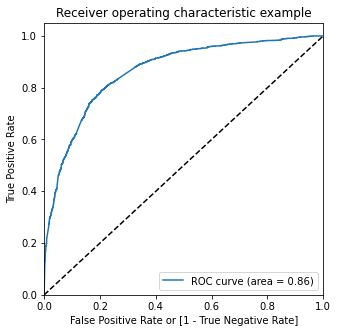

In [131]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [132]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.726008,1,1,1,1,1,1,1,1,1,0,0
1,0,0.157998,0,1,1,0,0,0,0,0,0,0,0
2,1,0.981053,1,1,1,1,1,1,1,1,1,1,1
3,0,0.132205,0,1,1,0,0,0,0,0,0,0,0
4,1,0.875421,1,1,1,1,1,1,1,1,1,1,0


In [133]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.478102  1.000000  0.000000
0.1   0.1  0.548358  0.987595  0.145979
0.2   0.2  0.709854  0.942748  0.496503
0.3   0.3  0.759580  0.900763  0.630245
0.4   0.4  0.789918  0.807252  0.774038
0.5   0.5  0.791515  0.751908  0.827797
0.6   0.6  0.775319  0.680344  0.862325
0.7   0.7  0.741788  0.548664  0.918706
0.8   0.8  0.716013  0.461355  0.949301
0.9   0.9  0.649179  0.286737  0.981206


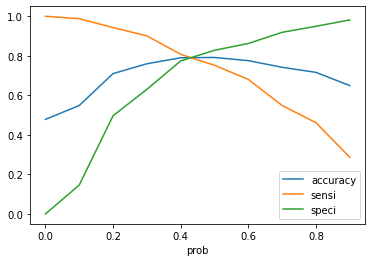

In [134]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.



In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.726008,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.157998,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.981053,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.132205,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.875421,1,1,1,1,1,1,1,1,1,1,0,1


In [136]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7906021897810219

In [137]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1802,  486],
       [ 432, 1664]], dtype=int64)

In [138]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculate Sensitivity

TP/(TP+FN)

0.7938931297709924

In [140]:
# Calculate Specificity

TN/(TN+FP)

0.7875874125874126

##cutoff point is good

# Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [141]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [142]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2457,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0,0
1935,0.117647,0.035651,0,0,1,0,0,0,0,1,0,0,0,0,0
4464,0.176471,0.082306,0,0,1,0,0,0,0,0,1,0,0,0,0
7986,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0
5136,0.058824,0.007042,0,0,1,0,0,0,0,0,0,0,0,0,0


In [143]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [144]:
# Check X_test_sm

X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2457,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0,0
1935,1.0,0.117647,0.035651,0,0,1,0,0,0,0,1,0,0,0,0,0
4464,1.0,0.176471,0.082306,0,0,1,0,0,0,0,0,1,0,0,0,0
7986,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0
5136,1.0,0.058824,0.007042,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0
2376,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0
5594,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0
3186,1.0,0.117647,0.341989,0,0,1,0,0,0,0,0,1,0,0,0,0


In [145]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [146]:
y_test_pred[:9]

2457    0.985035
1935    0.037671
4464    0.358416
7986    0.127700
5136    0.102643
3711    0.462957
6164    0.347854
8905    0.347854
1092    0.618675
dtype: float64

In [147]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

,0
2457,0.985035
1935,0.037671
4464,0.358416
7986,0.127700
5136,0.102643


In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.985035
1,0,0.037671
2,0,0.358416
3,0,0.127700
4,0,0.102643


In [153]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [154]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Converted,Conversion_Prob
0,1,0.985035
1,0,0.037671
2,0,0.358416
3,0,0.127700
4,0,0.102643


In [155]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [156]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.985035,1
1,0,0.037671,0
2,0,0.358416,0
3,0,0.127700,0
4,0,0.102643,0


In [157]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.788717402873869

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[769, 198],
       [199, 713]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Calculate sensitivity
TP / float(TP+FN)

0.7817982456140351

In [161]:
# Calculate specificity
TN / float(TN+FP)

0.795243019648397

# Precision-Recall View
Let's now also build the training model using the precision-recall view

In [162]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1894,  394],
       [ 520, 1576]], dtype=int64)

In [163]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8

In [164]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7519083969465649

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 4379    0
 4380    0
 4381    1
 4382    1
 4383    0
 Name: Converted, Length: 4384, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 4379    0
 4380    0
 4381    0
 4382    0
 4383    0
 Name: Predicted, Length: 4384, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


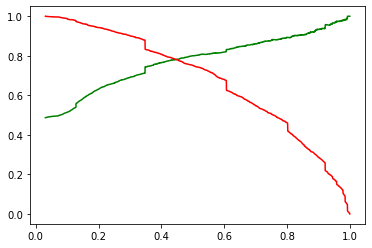

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [169]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.726008,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.157998,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.981053,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.132205,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.875421,1,1,1,1,1,1,1,1,1,1,0,1


In [170]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.791286496350365

In [171]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  465],
       [ 450, 1646]], dtype=int64)

In [172]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
TP/(TP+FP)

0.7797252486972999

In [174]:
TP/(TP+FN)

0.7853053435114504

Observation:
After running the model on the Test Data these are the figures we obtain:

TEST DATA:
Accuracy : 79 %
Sensitivity : 79%
Specificity : 78%

TRAIN DATA: ¶
Accuracy : 79%
Sensitivity : 78%
Specificity : 79%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model
